In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import dill
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# To Read out 1000 rows rather than the default value. 
pd.set_option('display.max_rows', 1000)

# To Read out 1000 columns rather than the default value. 
pd.set_option('display.max_columns', 1000)

# Not prinitng the warnings
warnings.filterwarnings('ignore')

# Setting the working directory for data and output files
cwd = os.getcwd()
os.chdir(cwd + '/data/')

# Setting a random seed for reproducability
np.random.seed(7)

# Setting up graoh text font
font = {'fontname':'Garamond'}

# To make the plot output, appear and be stored within the notebook.
%matplotlib inline

# Setting the environment for temporary results
%env JOBLIB_TEMP_FOLDER = /tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [4]:
# Problem 1
df = pd.read_csv('kplr_dr25_inj1_plti.csv', header = 0)

print('Dataset Size:')
print(df.shape)
print()

temp_df = df.iloc[:, 0:15]
df_drop = temp_df[temp_df.isnull().any(axis=1)]
temp_df = temp_df.drop(df_drop.index.values)
temp_df = temp_df[temp_df.Recovered != 2]

print('Cleaned Dataset Size:')
print(temp_df.shape)
print()

corr_mat = temp_df.iloc[:, 1:15]

print('Matrix Data Size:', corr_mat.shape)

Dataset Size:
(146294, 25)

Cleaned Dataset Size:
(145671, 15)

Matrix Data Size: (145671, 14)


In [5]:
'''
# Problem 2
df = pd.read_csv('kplr_dr25_inj1_tces.csv', header = 0)

print('Dataset Size: ')
print(df.shape)
print()

cols = ['TCE_ID', 'KIC', 'Disp', 'Score', 'period', 'epoch', 'NTL', 'SS', 
        'CO', 'EM', 'Expected_MES', 'MES', 'NTran', 'depth', 'duration', 'Rp',
        'Rs', 'Ts', 'logg', 'a', 'Rp/Rs', 'a/Rs', 'impact', 'SNR_DV', 'Sp',
        'Fit_Prov']
df = df[cols]
df.columns

df['Disp'] = df['Disp'].replace('PC', 1)
df['Disp'] = df['Disp'].replace('FP', 0)

X = df.iloc[:, 6:25]
Y = df.iloc[:, 2]

print('Input Size:', X.shape)
print('Output Size:', Y.shape)
'''

"\n# Problem 2\ndf = pd.read_csv('kplr_dr25_inj1_tces.csv', header = 0)\n\nprint('Dataset Size: ')\nprint(df.shape)\nprint()\n\ncols = ['TCE_ID', 'KIC', 'Disp', 'Score', 'period', 'epoch', 'NTL', 'SS', \n        'CO', 'EM', 'Expected_MES', 'MES', 'NTran', 'depth', 'duration', 'Rp',\n        'Rs', 'Ts', 'logg', 'a', 'Rp/Rs', 'a/Rs', 'impact', 'SNR_DV', 'Sp',\n        'Fit_Prov']\ndf = df[cols]\ndf.columns\n\ndf['Disp'] = df['Disp'].replace('PC', 1)\ndf['Disp'] = df['Disp'].replace('FP', 0)\n\nX = df.iloc[:, 6:25]\nY = df.iloc[:, 2]\n\nprint('Input Size:', X.shape)\nprint('Output Size:', Y.shape)\n"

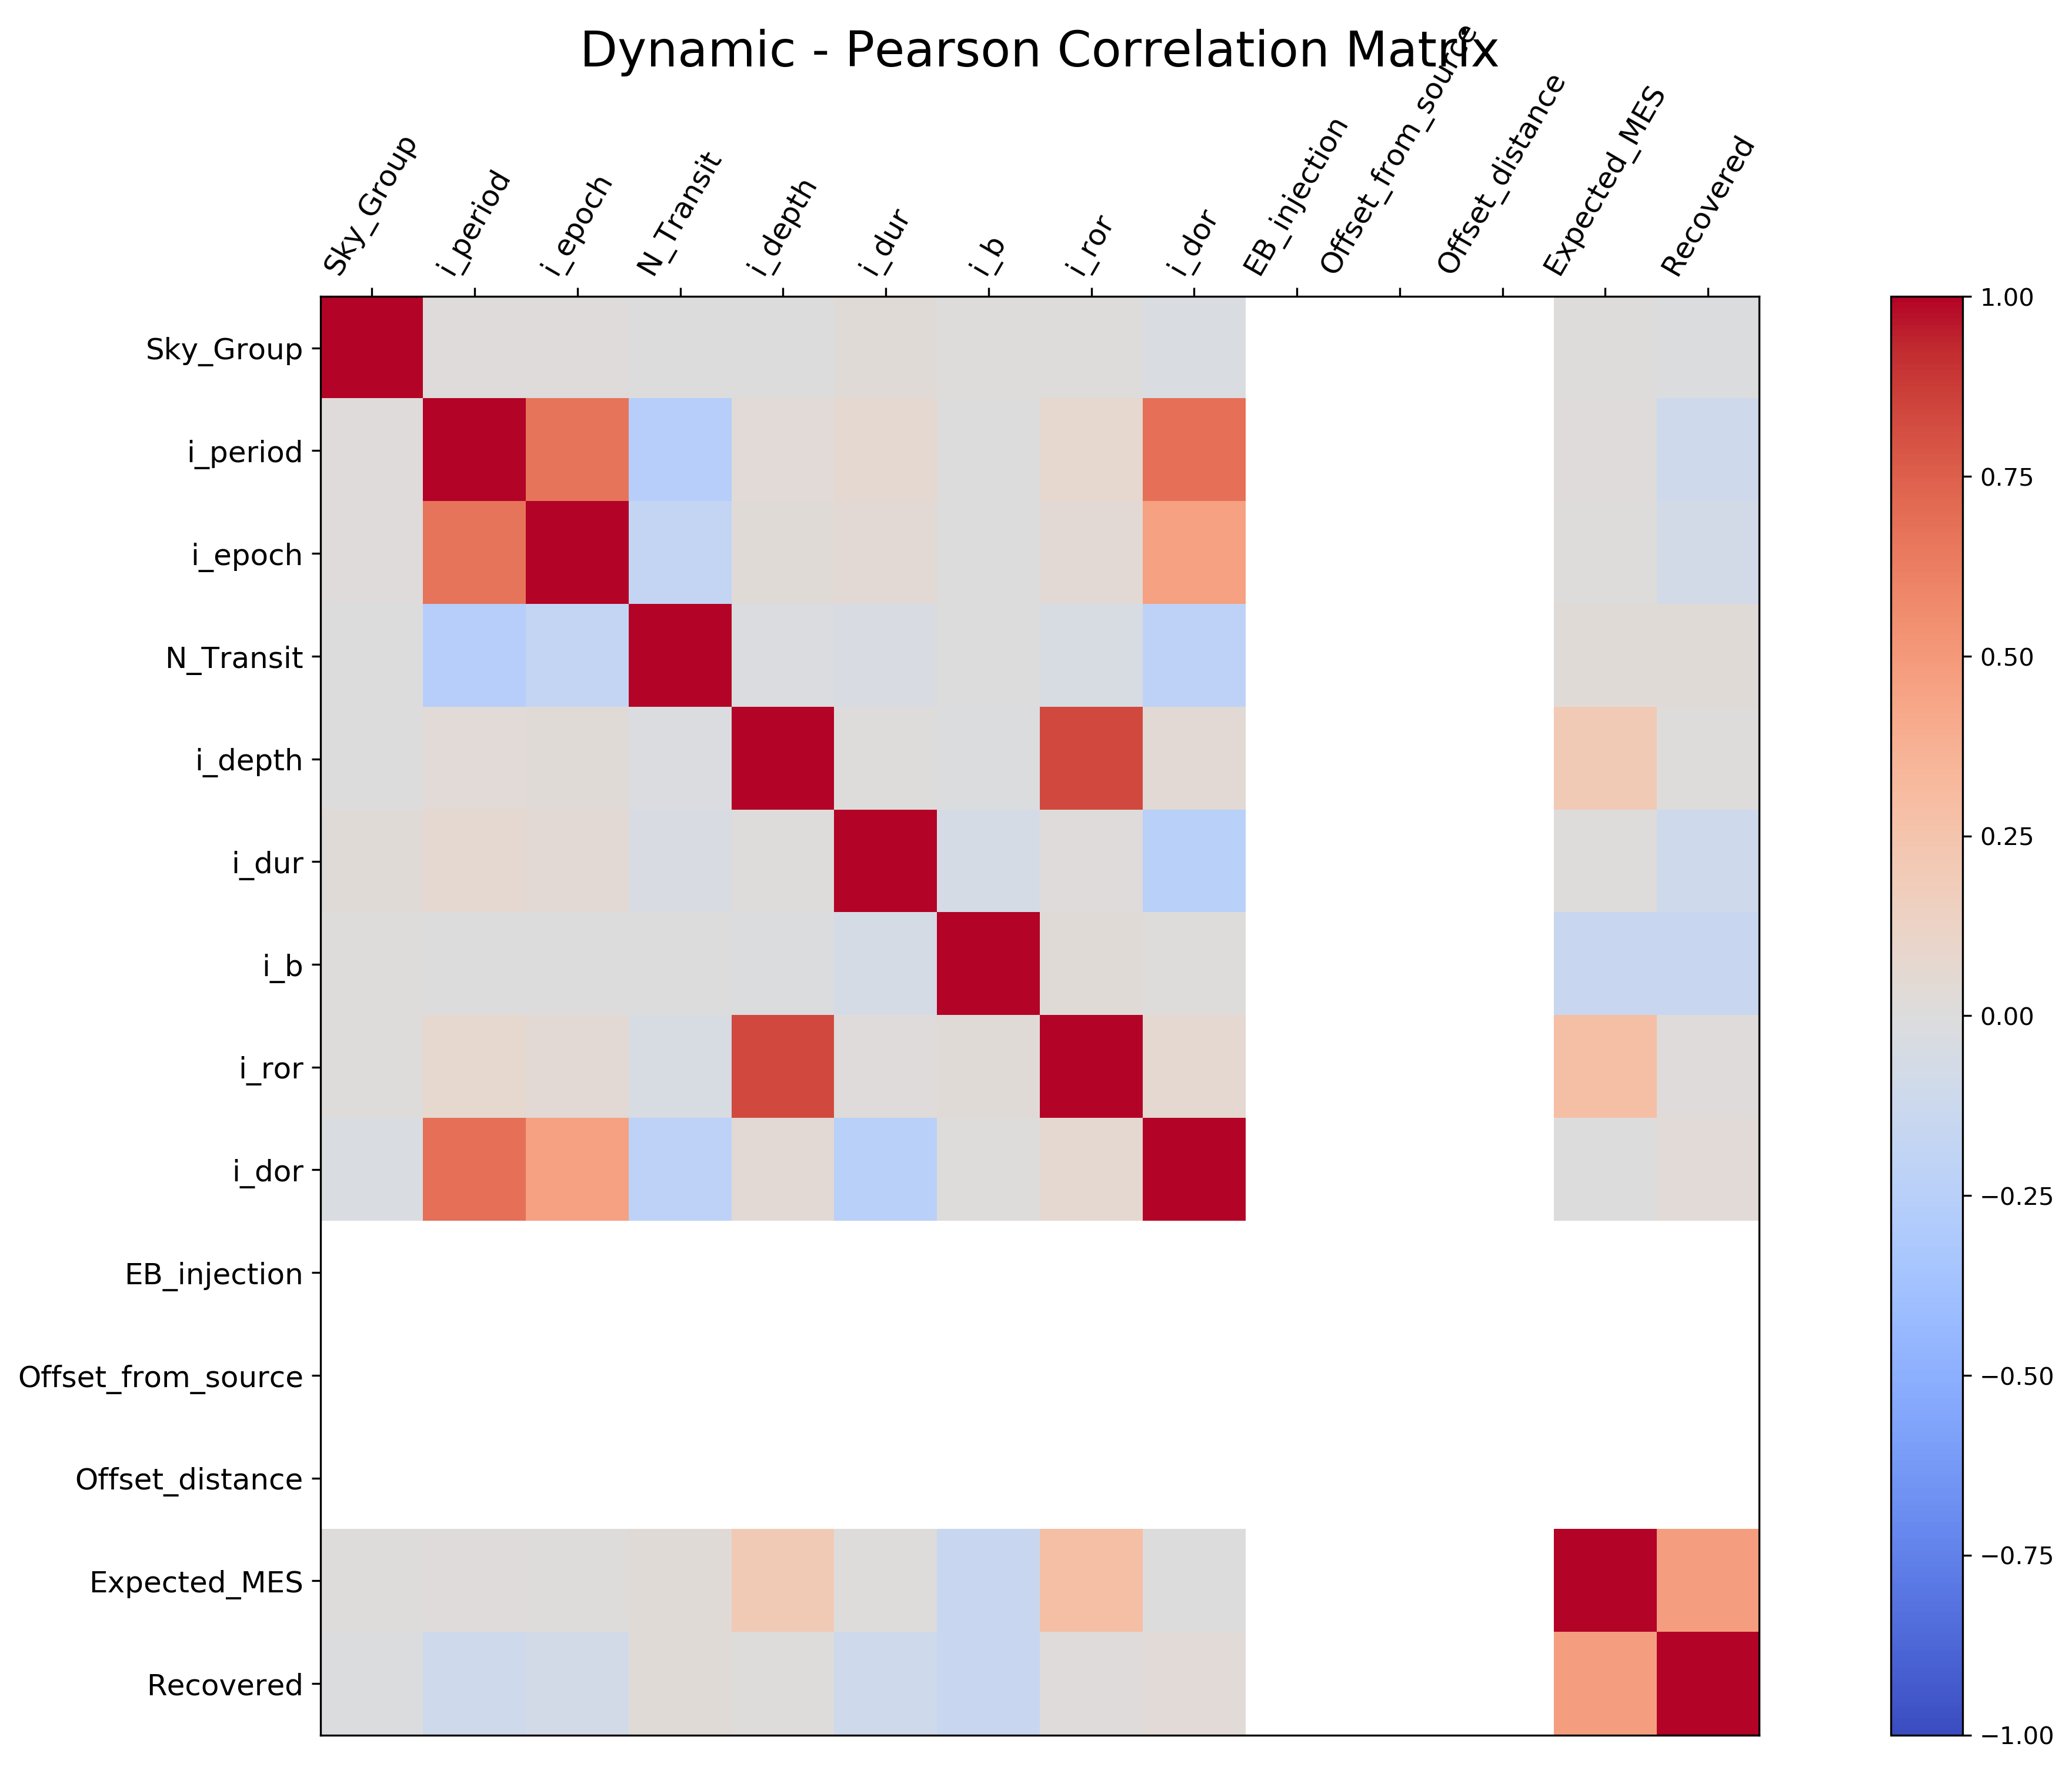

Pearson Correlation Results:
		Recovered Correlation:
Expected_MES          0.474745
i_dor                 0.031984
N_Transit             0.029923
i_ror                 0.014925
i_depth               0.004817
Sky_Group            -0.012066
i_epoch              -0.075529
i_dur                -0.104474
i_period             -0.104704
i_b                  -0.144775
EB_injection               NaN
Offset_from_source         NaN
Offset_distance            NaN
Name: Recovered, dtype: float64


<Figure size 432x288 with 0 Axes>

In [6]:
# Plot correlation matrix
col_names = corr_mat.columns
correlations = corr_mat.corr(method = 'pearson')
fig = plt.figure(figsize=(19.20, 10.80), dpi = 300)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1, cmap = 'coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(col_names),1)
plt.tick_params(axis='x', bottom=False)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names, **font, fontsize = 12, rotation = 60)
ax.set_yticklabels(col_names, **font, fontsize = 12)
plt.title('Dynamic - Pearson Correlation Matrix', fontsize=20, **font, y=1.15)
plt.savefig('Dynamic - Pearson Correlation Matrix.jpg', dpi=1200, bbox_inches='tight')
plt.show()
plt.clf()

Recovered_corr = correlations.Recovered.sort_values(ascending = False)
print('Pearson Correlation Results:')
print('\t\tRecovered Correlation:')
print(Recovered_corr[1:])

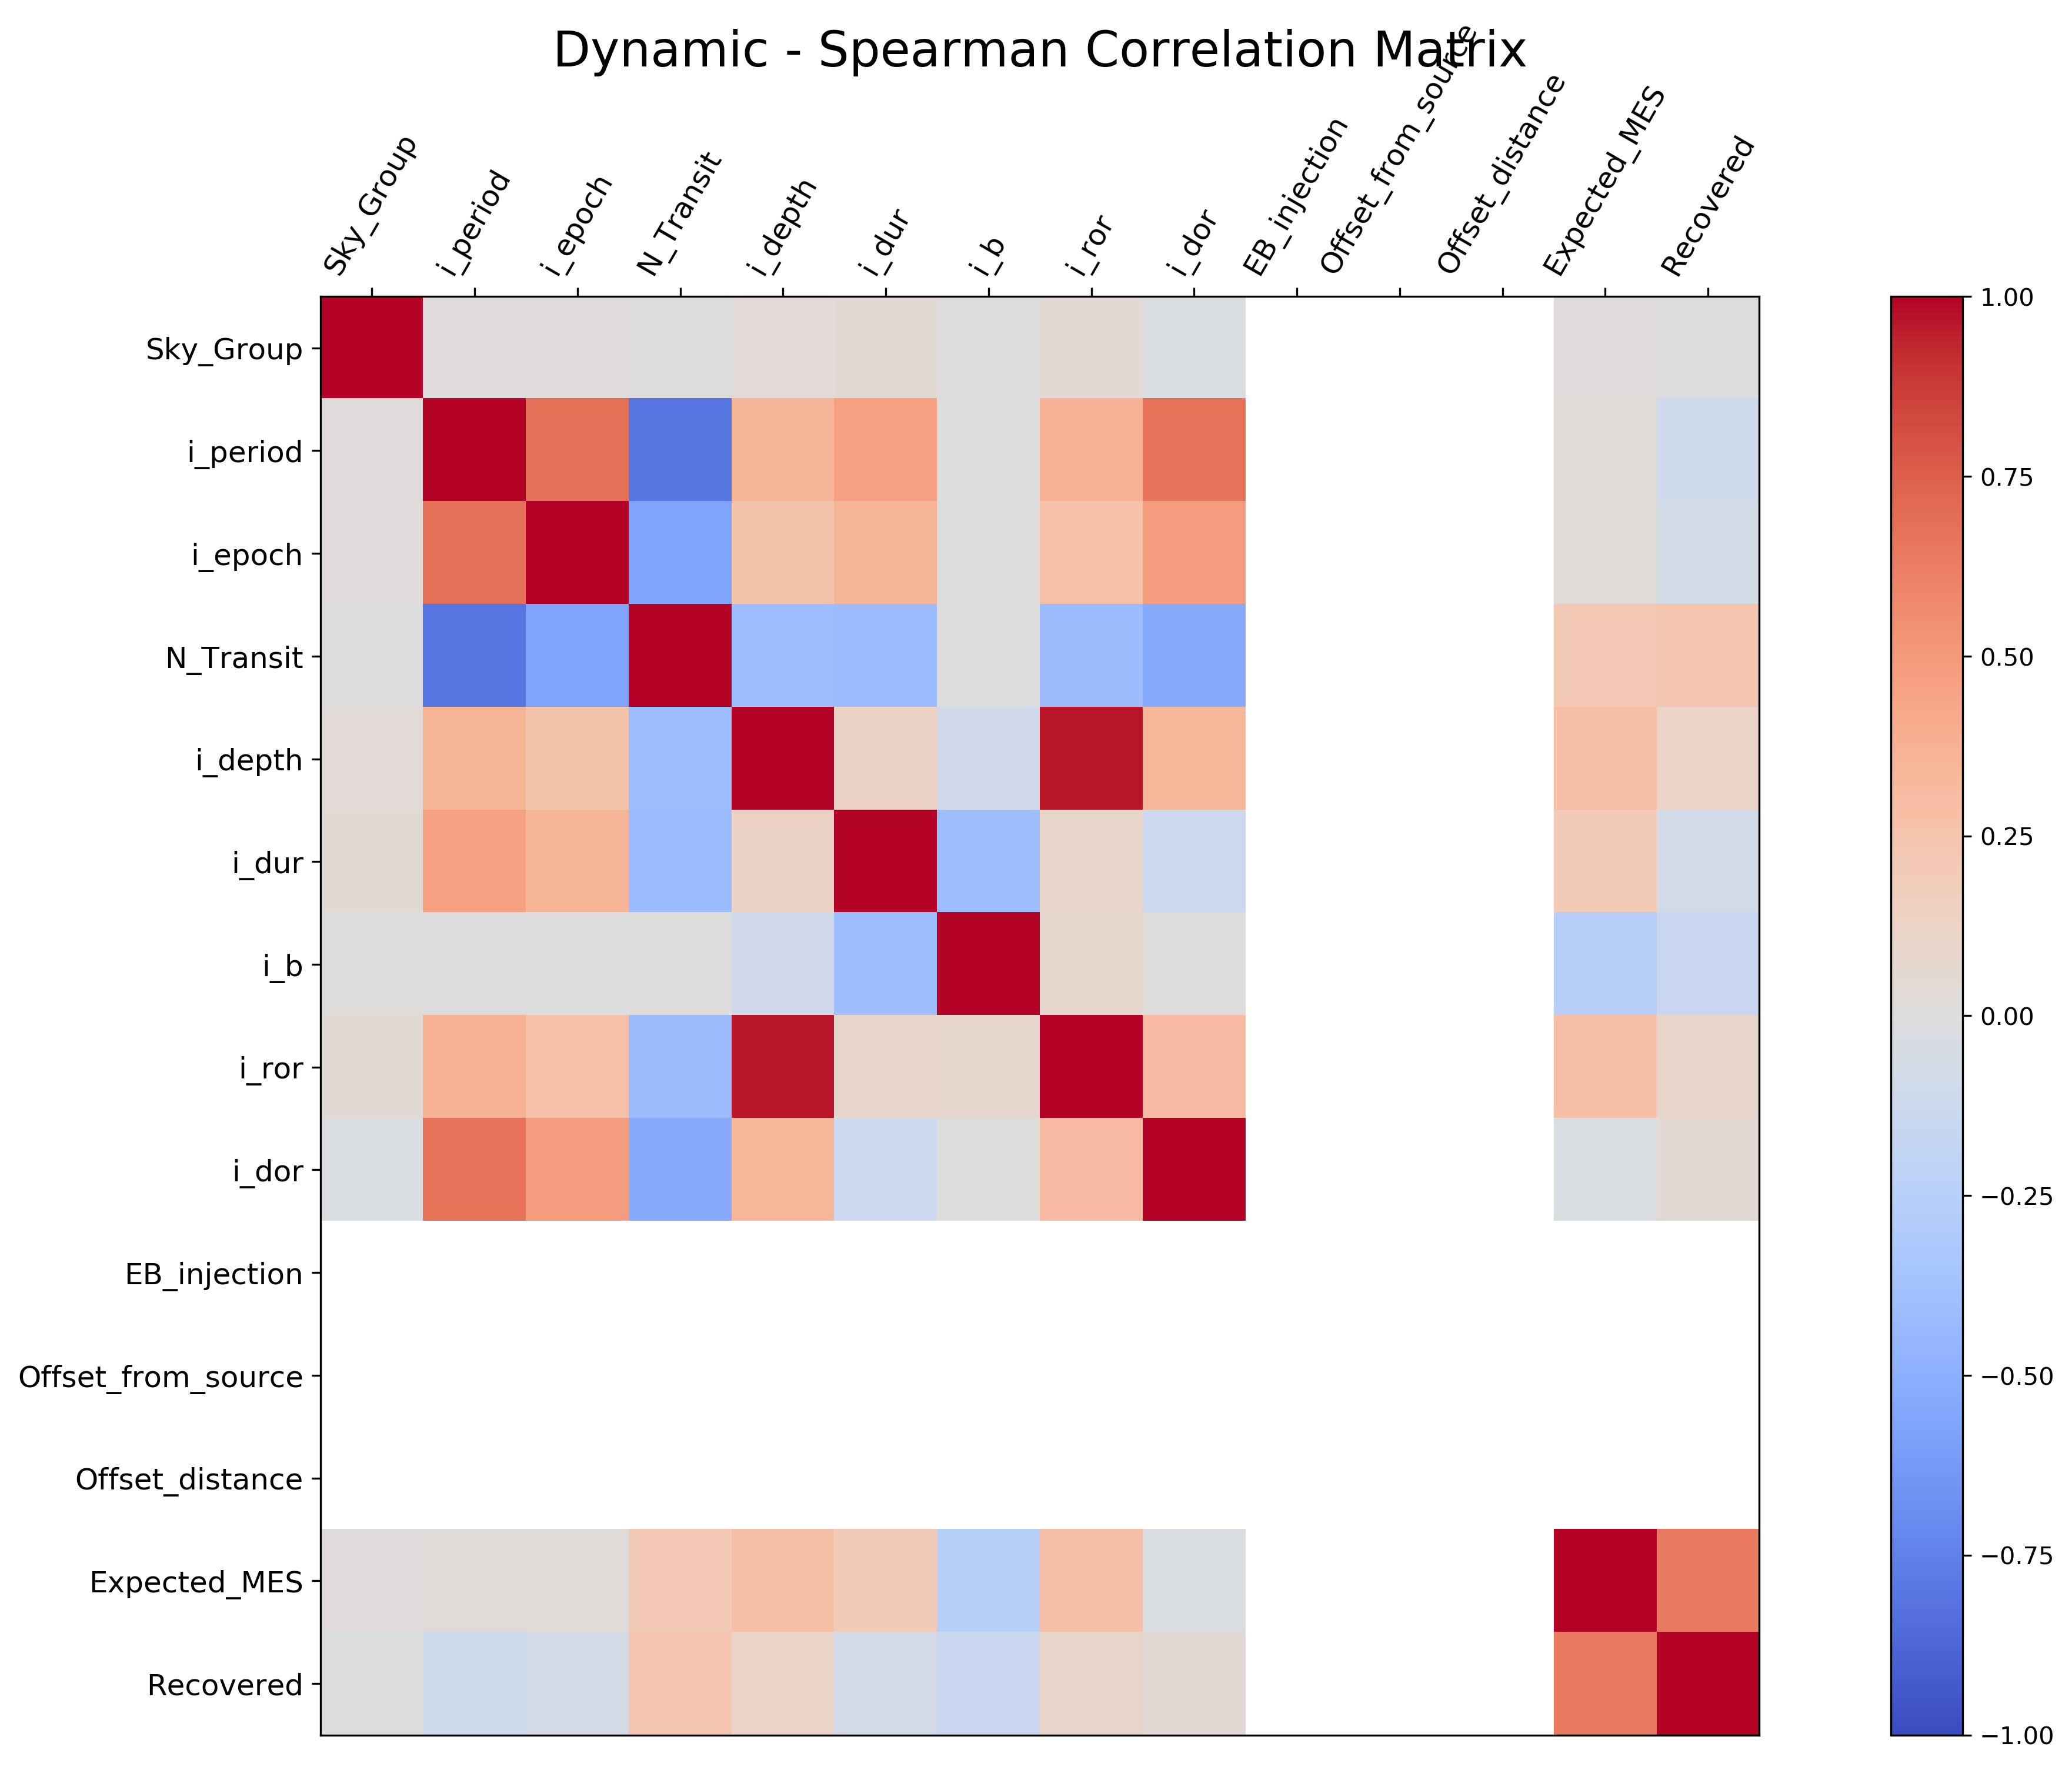

Spearman Correlation Results:
		Recovered Correlation:
Expected_MES          0.646420
N_Transit             0.234836
i_depth               0.116823
i_ror                 0.094396
i_dor                 0.043095
Sky_Group            -0.011161
i_epoch              -0.062664
i_dur                -0.071610
i_period             -0.103141
i_b                  -0.144773
EB_injection               NaN
Offset_from_source         NaN
Offset_distance            NaN
Name: Recovered, dtype: float64


<Figure size 432x288 with 0 Axes>

In [7]:
# Plot correlation matrix
col_names = corr_mat.columns
correlations = corr_mat.corr(method = 'spearman')
fig = plt.figure(figsize=(19.20, 10.80), dpi = 300)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1, cmap = 'coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(col_names),1)
plt.tick_params(axis='x', bottom=False)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names, **font, fontsize = 12, rotation = 60)
ax.set_yticklabels(col_names, **font, fontsize = 12)
plt.title('Dynamic - Spearman Correlation Matrix', fontsize=20, **font, y=1.15)
plt.savefig('Dynamic - Spearman Correlation Matrix.jpg', dpi=1200, bbox_inches='tight')
plt.show()
plt.clf()

Recovered_corr = correlations.Recovered.sort_values(ascending = False)
print('Spearman Correlation Results:')
print('\t\tRecovered Correlation:')
print(Recovered_corr[1:])